In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../data/weight-height.csv')

In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


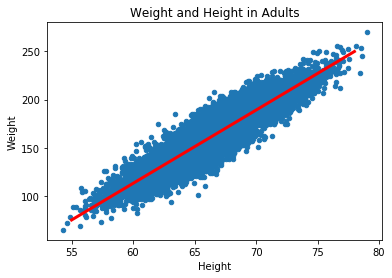

In [9]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [11]:
def line(x, w=0, b=0):
    return x * w + b

In [20]:
x = np.linspace(55, 80, 100)
# x

In [21]:
yhat = line(x, w=0, b=0)
# yhat

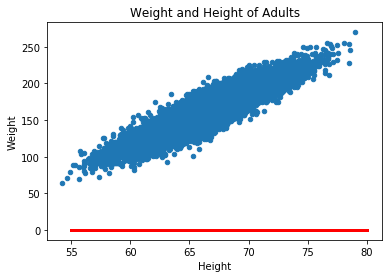

In [23]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height of Adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [24]:
def mean_squared_error(y, yhat):
    s = (y - yhat)**2
    return s.mean()

In [25]:
X = df[['Height']].values
y = df[['Weight']].values

In [26]:
y

array([[241.89356318],
       [162.31047252],
       [212.74085556],
       ...,
       [128.47531878],
       [163.85246135],
       [113.64910268]])

In [28]:
yhat = line(X)
yhat

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [30]:
mean_squared_error(y, yhat.ravel())

27093.837574561494

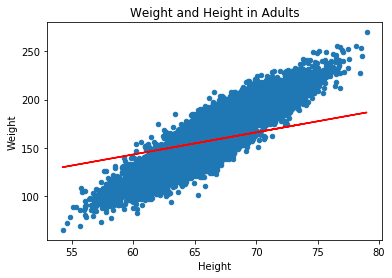

In [42]:
yhat = line(X, w=2.3, b=5)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')
plt.plot(X, yhat, color='red')

Text(0.5, 0, 'b')

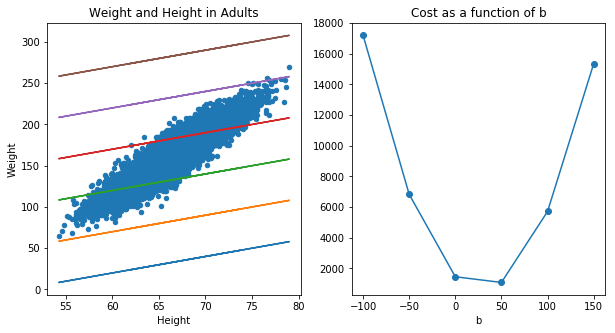

In [43]:
plt.figure(figsize=(10, 5))

ax1 = plt.subplot(121)
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults', ax=ax1)

bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []
for b in bbs:
    yhat = line(X, w=2, b=b)
    mse = mean_squared_error(y, yhat)
    mses.append(mse)
    plt.plot(X, yhat)
    
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

### Linear Regression with Keras

In [44]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [45]:
model = Sequential()

In [46]:
model.add(Dense(1, input_shape=(1, )))

In [47]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [49]:
model.fit(X, y, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 1s 59us/step - loss: 904.3120
Epoch 2/40
10000/10000 [==============================] - 0s 28us/step - loss: 559.4827
Epoch 3/40
10000/10000 [==============================] - 0s 27us/step - loss: 525.6153
Epoch 4/40
10000/10000 [==============================] - 0s 28us/step - loss: 474.0015
Epoch 5/40
10000/10000 [==============================] - 0s 27us/step - loss: 420.3578
Epoch 6/40
10000/10000 [==============================] - 0s 27us/step - loss: 384.5760
Epoch 7/40
10000/10000 [==============================] - 0s 27us/step - loss: 363.2789
Epoch 8/40
10000/10000 [==============================] - 0s 28us/step - loss: 316.9975
Epoch 9/40
10000/10000 [==============================] - 0s 27us/step - loss: 302.2686
Epoch 10/40
10000/10000 [==============================] - 0s 27us/step - loss: 299.8922
Epoch 11/40
10000/10000 [==============================] - 0s 27us/step - loss: 260.7737
Epoch 12/40
10000/10000 [=====

In [50]:
yhat = model.predict(X)

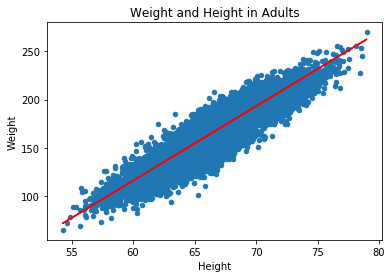

In [51]:
df.plot(kind='scatter',
       x='Height',
       y='Weight',
       title='Weight and Height in Adults')
plt.plot(X, yhat, color='red')

In [52]:
W, B = model.get_weights()

In [53]:
W

array([[7.732983]], dtype=float32)

In [54]:
B

array([-348.14178], dtype=float32)

### Evaluating Model Performance

In [55]:
from sklearn.metrics import r2_score

In [57]:
print("The R2 score is {:0.3f}".format(r2_score(y, yhat)))

The R2 score is 0.842


In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2)

In [62]:
len(X_train)

8000

In [63]:
len(X_test)

2000

In [64]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [65]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [66]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [67]:
from sklearn.metrics import mean_squared_error as mse

In [69]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(
    mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(
    mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	192.8
The Mean Squared Error on the Test set is:	184.9


In [70]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.814
The R2 score on the Test set is:	0.816


### Classification

In [71]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [72]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


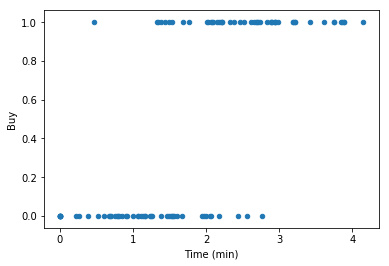

In [73]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [74]:
model = Sequential()

In [75]:
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [76]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', 
              metrics=['accuracy'])

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [80]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 2ms/step - loss: 0.7567 - acc: 0.5700
Epoch 2/25
100/100 [==============================] - 0s 57us/step - loss: 0.5732 - acc: 0.6600
Epoch 3/25
100/100 [==============================] - 0s 64us/step - loss: 0.5193 - acc: 0.7600
Epoch 4/25
100/100 [==============================] - 0s 64us/step - loss: 0.5199 - acc: 0.7400
Epoch 5/25
100/100 [==============================] - 0s 40us/step - loss: 0.4877 - acc: 0.8000
Epoch 6/25
100/100 [==============================] - 0s 55us/step - loss: 0.4844 - acc: 0.8000
Epoch 7/25
100/100 [==============================] - 0s 67us/step - loss: 0.4650 - acc: 0.7800
Epoch 8/25
100/100 [==============================] - 0s 63us/step - loss: 0.4831 - acc: 0.7700
Epoch 9/25
100/100 [==============================] - 0s 76us/step - loss: 0.4586 - acc: 0.7900
Epoch 10/25
100/100 [==============================] - 0s 58us/step - loss: 0.4428 - acc: 0.7900
Epoch 11/25
100/100 [===================

In [83]:
temp_class = model.predict(temp) > 0.5

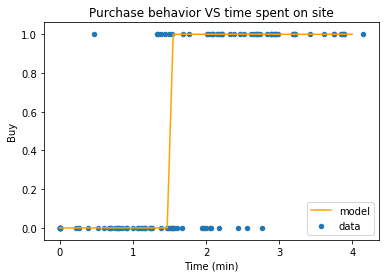

In [84]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
            title='Purchase behavior VS time spent on site')
temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [87]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.5

In [88]:
from sklearn.metrics import accuracy_score

In [90]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.790


In [93]:
params = model.get_weights()
params = [ np.zeros(w.shape) for w in params ]
model.set_weights(params)

In [94]:
print("The accuracy score is {:0.3f}".format(
    accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [99]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [102]:
# print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
# print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

### Cross Validation

In [103]:
from keras.wrappers.scikit_learn import KerasClassifier

In [104]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                 'binary_crossentropy',
                 metrics=['accuracy'])
    return model

In [105]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                       epochs=25,
                       verbose=0)

In [106]:
from sklearn.model_selection import cross_val_score, KFold

In [107]:
cv = KFold(3, shuffle=True)

In [108]:
scores = cross_val_score(model, X, y, cv=cv)
scores

array([0.85294118, 0.81818182, 0.60606061])

In [109]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.7591 ± 0.1091


### Confusion Matrix

In [110]:
from sklearn.metrics import confusion_matrix

In [111]:
confusion_matrix(y, y_class_pred)

array([[35, 15],
       [ 6, 44]], dtype=int64)

In [112]:
def pretty_confusion_matrix(y_true, y_pred, labels=['False', 
                                                    'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [113]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,35,15
Buy,6,44


In [114]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [115]:
print('Precison:\t{:03f}'.format(precision_score(y, y_class_pred)))
print('Recall:  \t{:0.3f}'.format(recall_score(y, y_class_pred)))
print('F1 Score:\t{:0.3f}'.format(f1_score(y, y_class_pred)))

Precison:	0.745763
Recall:  	0.880
F1 Score:	0.807


In [116]:
from sklearn.metrics import classification_report

In [117]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.85      0.70      0.77        50
           1       0.75      0.88      0.81        50

   micro avg       0.79      0.79      0.79       100
   macro avg       0.80      0.79      0.79       100
weighted avg       0.80      0.79      0.79       100



### Categorical Features

In [118]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [119]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [120]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

In [121]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs))'] = df['Weight']/100.0

In [122]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs))
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


In [123]:
from sklearn.preprocessing import MinMaxScaler

In [125]:
mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


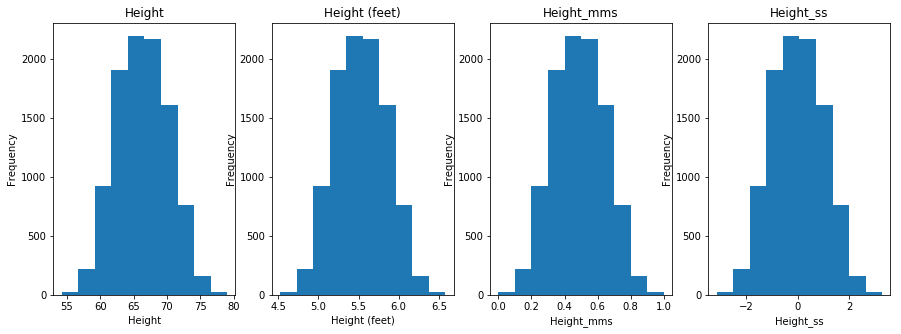

In [128]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)',
                            'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [129]:
df = pd.read_csv('../data/housing-data.csv')

In [130]:
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [133]:
df.columns

Index(['sqft', 'bdrms', 'age', 'price'], dtype='object')

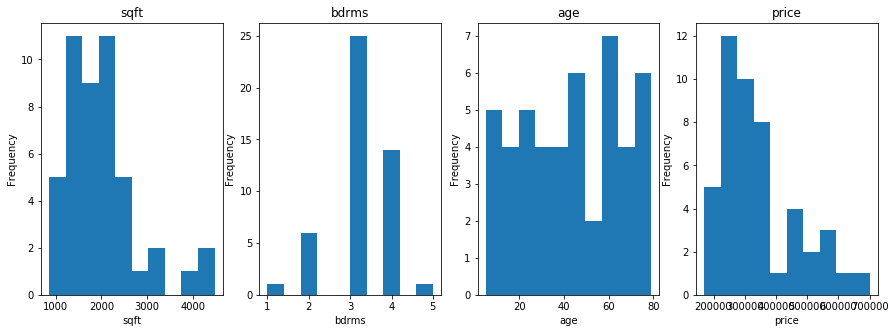

In [134]:
plt.figure(figsize=(15, 5))
for i, feature in enumerate(df.columns):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

In [135]:
X = df[['sqft', 'bdrms', 'age']].values
y = df['price'].values

In [136]:
X

array([[2104,    3,   70],
       [1600,    3,   28],
       [2400,    3,   44],
       [1416,    2,   49],
       [3000,    4,   75],
       [1985,    4,   61],
       [1534,    3,   12],
       [1427,    3,   57],
       [1380,    3,   14],
       [1494,    3,   15],
       [1940,    4,    7],
       [2000,    3,   27],
       [1890,    3,   45],
       [4478,    5,   49],
       [1268,    3,   58],
       [2300,    4,   77],
       [1320,    2,   62],
       [1236,    3,   78],
       [2609,    4,    5],
       [3031,    4,   21],
       [1767,    3,   44],
       [1888,    2,   79],
       [1604,    3,   13],
       [1962,    4,   53],
       [3890,    3,   36],
       [1100,    3,   60],
       [1458,    3,   29],
       [2526,    3,   13],
       [2200,    3,   28],
       [2637,    3,   25],
       [1839,    2,   40],
       [1000,    1,    5],
       [2040,    4,   75],
       [3137,    3,   67],
       [1811,    4,   24],
       [1437,    3,   50],
       [1239,    3,   22],
 

In [137]:
y

array([399900, 329900, 369000, 232000, 539900, 299900, 314900, 198999,
       212000, 242500, 239999, 347000, 329999, 699900, 259900, 449900,
       299900, 199900, 499998, 599000, 252900, 255000, 242900, 259900,
       573900, 249900, 464500, 469000, 475000, 299900, 349900, 169900,
       314900, 579900, 285900, 249900, 229900, 345000, 549000, 287000,
       368500, 329900, 314000, 299000, 179900, 299900, 239500],
      dtype=int64)

In [151]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [153]:
model = Sequential()
model.add(Dense(1, input_shape=(3,)))
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [154]:
from sklearn.model_selection import train_test_split

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, test_size=0.2)

In [161]:
len(X_train)

37

In [162]:
len(X)

47

In [163]:
model.fit(X_train, y_train)

Epoch 1/1
37/37 [==============================] - 0s 85us/step - loss: 131117432610.5946


In [159]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [164]:
from sklearn.metrics import r2_score

In [166]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
print('The R2 score on the Train set is:\t{:0.3f}'.format(r2_score(
    y_train, y_train_pred)))
print('The R2 score on the Test set is:\t{:0.3f}'.format(r2_score(
    y_test, y_test_pred)))

The R2 score on the Train set is:	-7.033
The R2 score on the Test set is:	-8.473


In [167]:
model.fit(X_train, y_train, epochs=40, verbose=0)

In [168]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print('The R2 score for the Train set is:\t{:0.3f}'.format(r2_score(
    y_train, y_train_pred)))
print('The R2 score for the Test set is:\t{:0.3f}'.format(r2_score(
    y_test, y_test_pred)))

The R2 score for the Train set is:	-2.478
The R2 score for the Test set is:	-2.947


### HR Data Exercise

In [178]:
df = pd.read_csv('../data/HR_comma_sep.csv')

In [179]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [181]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [176]:
df.left.value_counts() / len(df)

0    0.761917
1    0.238083
Name: left, dtype: float64

In [177]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['number_project'] = ss.fit_transform(df[['number_project']])
df['average_montly_hours'] = ss.fit_transform(df[['average_montly_hours']])
df['time_spend_company'] = ss.fit_transform(df[['time_spend_company']])

C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


count    1.499900e+04
mean     5.589976e-17
std      1.000033e+00
min     -1.462863e+00
25%     -6.515376e-01
50%      1.597876e-01
75%      9.711129e-01
max      2.593763e+00
Name: number_project, dtype: float64

In [202]:
# plt.figure(figsize=(15, 10))

# df.columns
# for i, feature in enumerate(df.columns):
#     if feature != 'sales' or feature != 'salary':
#         plt.subplot(3, 4, i+1)
#         df[feature].plot(kind='hist', title=feature)


In [205]:
df_dummies = pd.get_dummies(df[['sales', 'salary']])

In [206]:
df_dummies.head()

,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [207]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [209]:
X = pd.concat([df[['satisfaction_level', 'last_evaluation', 
    'number_project', 'time_spend_company', 'Work_accident',
    'promotion_last_5years', 'average_montly_hours']],
    df_dummies], axis=1).values
y = df['left'].values

In [210]:
X.shape

(14999, 20)

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2)

In [212]:
model = Sequential()
model.add(Dense(1, input_dim=20, activation='sigmoid'))
model.compile(Adam(lr=0.5), 'binary_crossentropy',
             metrics=['accuracy'])

In [213]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 21        
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [214]:
model.fit(X_train, y_train)

Epoch 1/1
11999/11999 [==============================] - 1s 58us/step - loss: 3.8770 - acc: 0.7577


In [215]:
y_test_pred = model.predict(X_test)

In [216]:
from sklearn.metrics import confusion_matrix, classification_report

In [217]:
def pretty_confusion_matrix(y_true, y_pred, 
                            labels=['False', 'True']):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted ' + l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [218]:
pretty_confusion_matrix(y_test, y_test_pred,
                       labels=['Stay', 'Leave'])

,Predicted Stay,Predicted Leave
Stay,2321,0
Leave,679,0


In [220]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87      2321
           1       0.00      0.00      0.00       679

   micro avg       0.77      0.77      0.77      3000
   macro avg       0.39      0.50      0.44      3000
weighted avg       0.60      0.77      0.67      3000



C:\Users\Philippe\Anaconda3\envs\ztdl\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [221]:
from keras.wrappers.scikit_learn import KerasClassifier

In [225]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_dim=20, activation='sigmoid'))
    model.compile(Adam(lr=0.5), 'binary_crossentropy', 
                 metrics=['accuracy'])
    return model
model = KerasClassifier(build_fn=build_logistic_regression_model,
                       epochs=10, verbose=0)

In [226]:
from sklearn.model_selection import KFold, cross_val_score

In [227]:
cv = KFold(5, shuffle=True)
scores = cross_val_score(model, X, y, cv=cv)

print('The cross validation accuracy is {:0.4f} +/- {:0.4f}'.
     format(scores.mean(), scores.std()))

The cross validation accuracy is 0.6578 +/- 0.2091
